In [1]:
import cw07
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Classwork 07

Raha & Jack

10/11/18

## Instructions

First, go through the slides indicated in the README and place any code fragments to test in the following subsection. Second, go through the rest of the notebook, execute lines to test them, and complete the coding assignments.

## Description

The following code benchmarks and plots 3 functions approximated both as python lists and as numpy arrays.

#### Gaussian Function:  $g(x) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{x^2}{2} \right)$

**List implementation**

In [2]:
%time x, g = cw07.gen_gaussian_list(-10,10,1000001)

CPU times: user 949 ms, sys: 42.4 ms, total: 991 ms
Wall time: 990 ms


In [3]:
gauss = pd.DataFrame({"x":x,"g(x)":g})
print(gauss.head())
print(gauss.tail())

          x          g(x)
0 -10.00000  7.694599e-23
1  -9.99998  7.696138e-23
2  -9.99996  7.697677e-23
3  -9.99994  7.699217e-23
4  -9.99992  7.700757e-23
                x          g(x)
999996    9.99992  7.700757e-23
999997    9.99994  7.699217e-23
999998    9.99996  7.697677e-23
999999    9.99998  7.696138e-23
1000000  10.00000  7.694599e-23


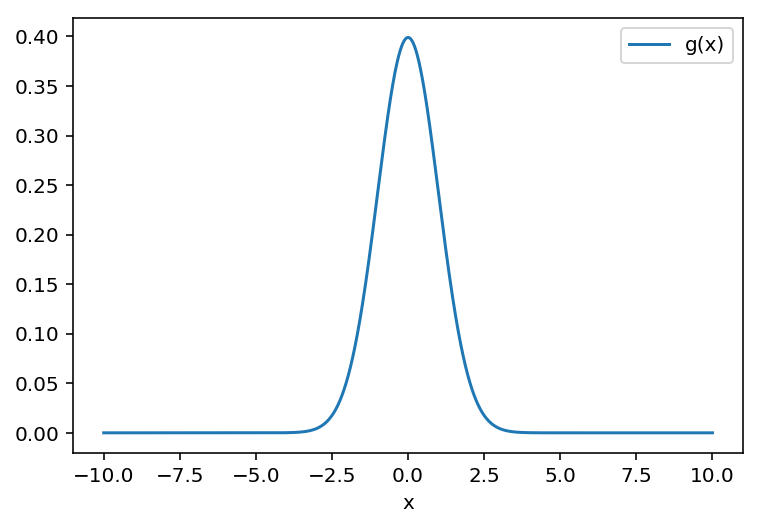

In [4]:
gauss.plot(x="x",y="g(x)")

**Array Implementation**

In [5]:
%time x, g = cw07.gen_gaussian_array(-10, 10, 1000001)

CPU times: user 860 ms, sys: 95.1 ms, total: 955 ms
Wall time: 963 ms


In [6]:
gauss = pd.DataFrame({"x":x,"g(x)":g})

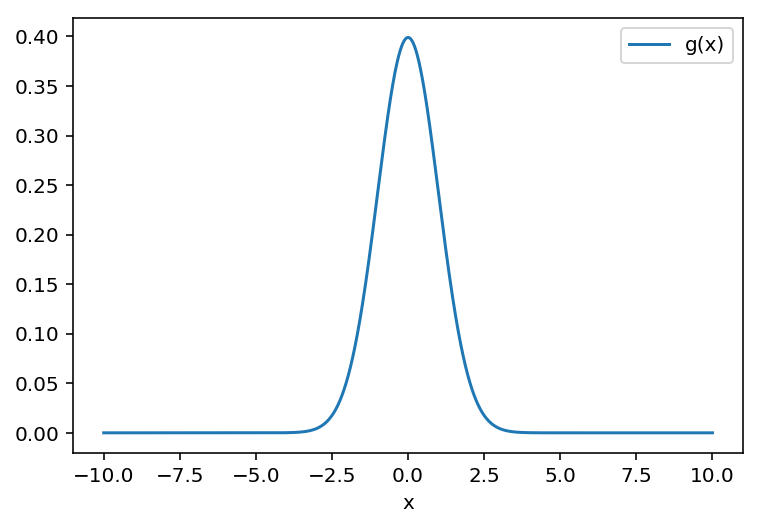

In [7]:
gauss.plot(x="x",y="g(x)")

**Side by Side Comparison**

In [41]:
%time x, g = cw07.gen_gaussian_list(-10, 10, 1000001)
%time x, g = cw07.gen_gaussian_array(-10, 10, 1000001)
# list implementation takes longer

CPU times: user 953 ms, sys: 48.6 ms, total: 1 s
Wall time: 1.02 s


CPU times: user 844 ms, sys: 38.7 ms, total: 883 ms
Wall time: 884 ms


#### Sinc Function:  $ \text{sinc}(x) = \frac{\sin(x)}{x}$

**List Implementation**

In [9]:
%time x1,y1 = cw07.gen_sinc_list(-10,10,100)

CPU times: user 135 µs, sys: 0 ns, total: 135 µs
Wall time: 140 µs


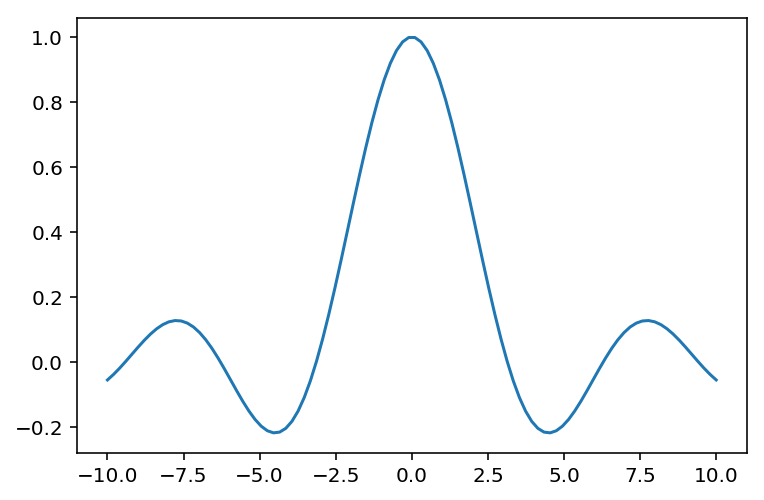

In [10]:
# visualization
plt.plot(x1,y1)

**Array Implementation**

In [11]:
%time x2,y2 = cw07.gen_sinc_array(-10,10,100)

CPU times: user 192 µs, sys: 49 µs, total: 241 µs
Wall time: 210 µs


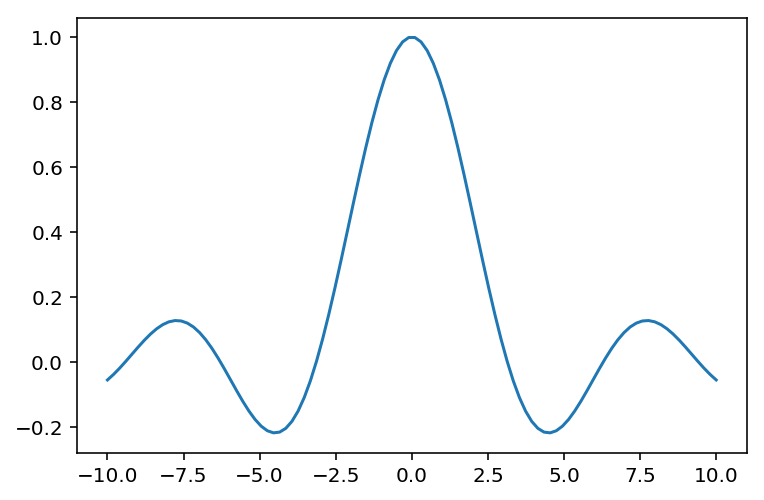

In [12]:
# visualization
plt.plot(x2,y2)

**Side-by-Side Comparison**

In [42]:
%time x1,y1 = cw07.gen_sinc_list(-10,10,10000)
%time x2,y2 = cw07.gen_sinc_array(-10,10,10000)

CPU times: user 9.77 ms, sys: 20 µs, total: 9.79 ms
Wall time: 10.3 ms
CPU times: user 2.22 ms, sys: 0 ns, total: 2.22 ms
Wall time: 1.71 ms


**How many points needed for accurate visual over 1 period (0.0 - 7.5)?**

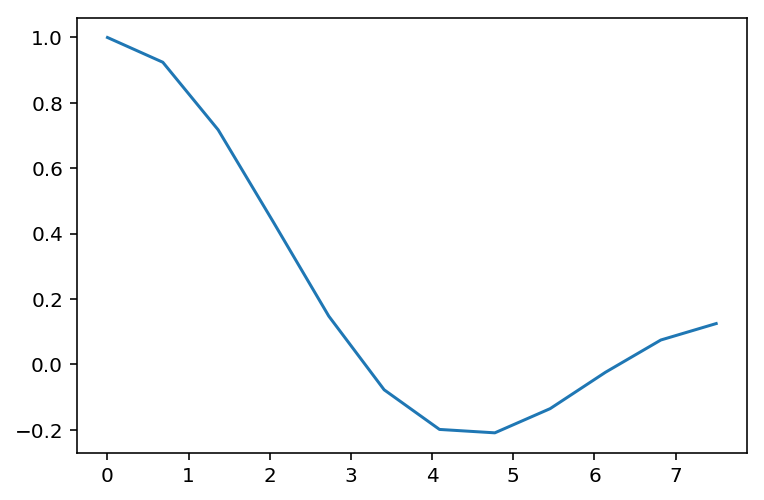

In [14]:
# used guess and check method to approximate
x3,y3 = cw07.gen_sinc_array(0,7.5,12)
plt.plot(x3,y3)

#### Sinf Function:  $\text{sinf}(x) = \sin\left(\frac{1}{x}\right)$

**List Implementation**

In [27]:
%time x1,y1 = cw07.gen_sinf_list(-1,1,10000)

CPU times: user 9.36 ms, sys: 369 µs, total: 9.73 ms
Wall time: 9.57 ms


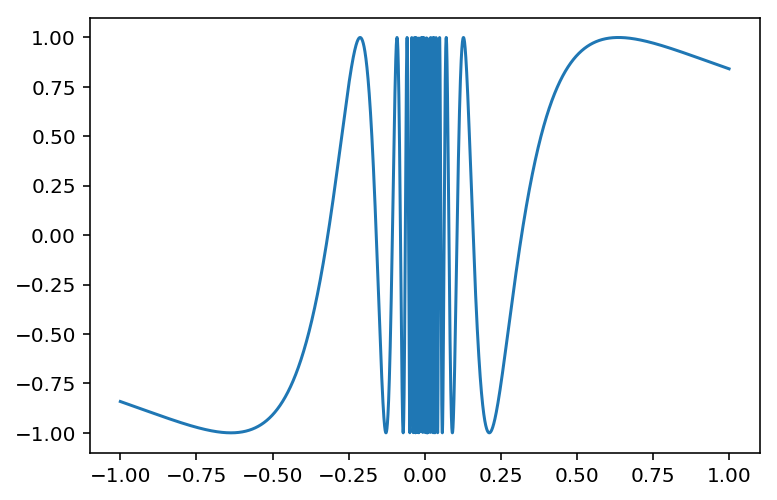

In [28]:
# visualization
plt.plot(x1,y1)

**Array Implementation**

In [34]:
%time x2,y2 = cw07.gen_sinf_array(-1,1,10000)

CPU times: user 1.42 ms, sys: 0 ns, total: 1.42 ms
Wall time: 20.1 ms


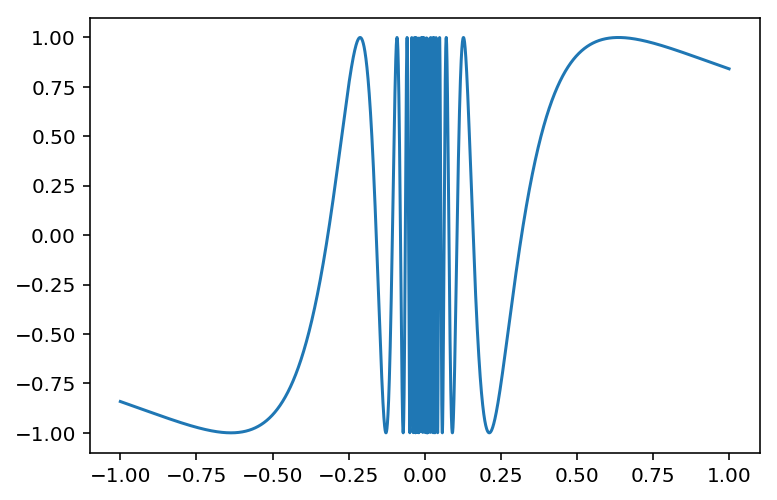

In [35]:
# visualization
plt.plot(x2,y2)

**Side-by-Side Comparision**

In [32]:
%time temp = cw07.gen_sinf_array(-10,10,10000)
%time temp = cw07.gen_sinf_list(-10,10,10000)

CPU times: user 781 µs, sys: 0 ns, total: 781 µs
Wall time: 638 µs
CPU times: user 8.92 ms, sys: 0 ns, total: 8.92 ms
Wall time: 32.3 ms


**Comments and determining required points for accurate graph**

One of the issues with plotting this function as that as x approaches 0, so too does the period length of the function. This means there are infinite periods between any x value and 0. Infinite periods each requiring multiple points to generate a completely accurate graph, making this task impossible. For the purposes of this assignment, we will consider a graph that accurately depicts the period between ~0.1 and ~0.5 while effectively illustrating the shrinking period phenomenon to be "accurate". It is also important to note that number of points required for accuray will change with the range of the function and the scale of the graph, so our required points value is *not* universally applicable to any graph of this function.

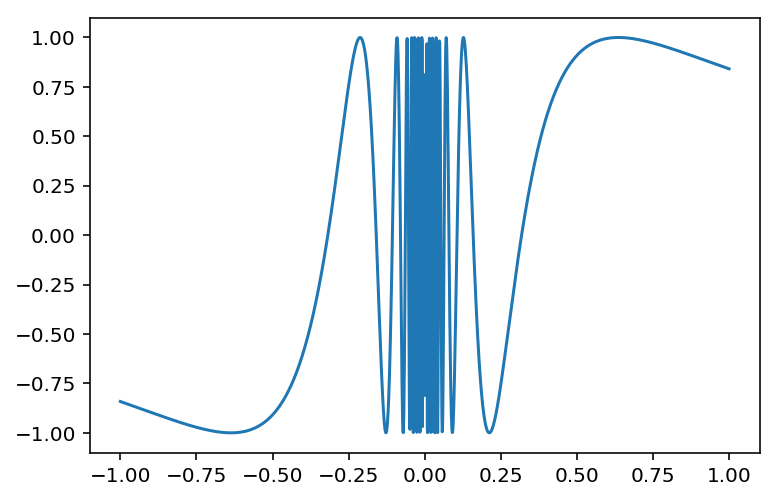

In [39]:
# using guess and check method to determine accuracy
x3,y3 = cw07.gen_sinf_array(-1,1,2000)
plt.plot(x3,y3)

## Conclusions

Having timed the functions, we see that the array implementations are clearly faster with a large number of points defined. While the array-based funtions perform well on larger number of points, we actually see the list functions outperforming them with a smaller number of points defined (shown below). This leads us to believe that numpy arrays are optimal for larger computations, but lists are alright to use at a smaller scale.

In [47]:
# gauss functions (n=10)
%time temp = cw07.gen_gaussian_list(0,10,10)
%time temp2 = cw07.gen_gaussian_array(0,10,10)

CPU times: user 37 µs, sys: 11 µs, total: 48 µs
Wall time: 52.9 µs
CPU times: user 244 µs, sys: 73 µs, total: 317 µs
Wall time: 298 µs


In [50]:
# sinc functions (n=10)
%time temp = cw07.gen_sinc_list(0,10,10)
%time temp2 = cw07.gen_sinc_array(0,10,10)

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 32.9 µs
CPU times: user 200 µs, sys: 0 ns, total: 200 µs
Wall time: 209 µs


In [49]:
# sinf functions (n=10)
%time temp = cw07.gen_sinf_list(0,10,10)
%time temp2 = cw07.gen_sinf_array(0,10,10)

CPU times: user 21 µs, sys: 7 µs, total: 28 µs
Wall time: 30.3 µs
CPU times: user 249 µs, sys: 0 ns, total: 249 µs
Wall time: 223 µs
